In [2]:
import pandas as pd
from pandas import Series,DataFrame
%pylab inline
from datetime import datetime
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv("Cleaned_data.csv")

In [4]:
df['Month']=df['date'].map(lambda x :datetime.strptime(x,"%Y-%m-%d").month)
df['Year']=df['date'].map(lambda x :datetime.strptime(x,"%Y-%m-%d").year)
df['Day of week']=df['date'].map(lambda x :datetime.strptime(x,"%Y-%m-%d").weekday() )

In [ ]:
#df['Day of week']=df['Day of week'].replace({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
#df['Month']=df['Month'].replace({0:'January',1:'February',2:'March',3:'April',4:'May',5:'June',6:'July',7:'July',8:'September',9:'October',10:'November',11:'December'})

In [5]:
df_18=df[df['Year']==2018]
df = df[df.Year !=2018]

In [6]:
df.head()

,Unnamed: 0,incident_id,date,state,city_or_county,n_killed,n_injured,latitude,location_description,longitude,...,Gang Related,Incident at School,Home Invastion,Mass Shooting,Murder/Suicide,OfficerInvolved,Month,DayofWeek,Year,Day of week
0,278,95289,2014-01-01,Michigan,Muskegon,0,0,43.2301,NaN,-86.2514,...,0,0,0,0,0,0,1,Wednesday,2014,2
1,279,92401,2014-01-01,New Jersey,Newark,0,0,40.7417,NaN,-74.1695,...,0,0,0,0,0,1,1,Wednesday,2014,2
2,280,92383,2014-01-01,New York,Queens,1,0,40.7034,NaN,-73.7474,...,0,0,0,0,0,0,1,Wednesday,2014,2
3,281,92142,2014-01-01,New York,Brooklyn,0,1,40.6715,NaN,-73.9476,...,0,0,0,0,0,0,1,Wednesday,2014,2
4,282,95261,2014-01-01,Missouri,Springfield,0,1,37.2646,NaN,-93.3007,...,0,0,0,0,0,0,1,Wednesday,2014,2


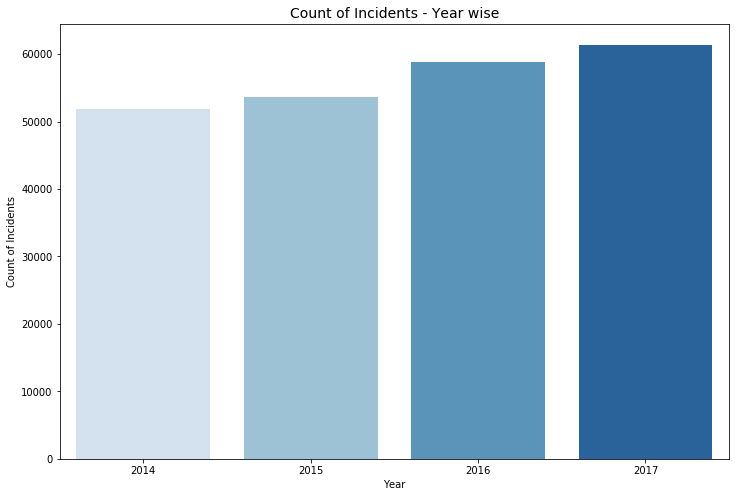

In [8]:
fig,ax = plt.subplots(figsize=(12,8))
#descending_order = df['Year'].value_counts().head(10).sort_values(ascending=True).index
sns.countplot(x="Year",data=df, palette = 'Blues')
ax.set_title('Count of Incidents - Year wise', loc='center', fontsize=14, fontweight=2, color='Black');
plt.ylabel('Count of Incidents')
plt.savefig('Yearwiseincident.jpeg')

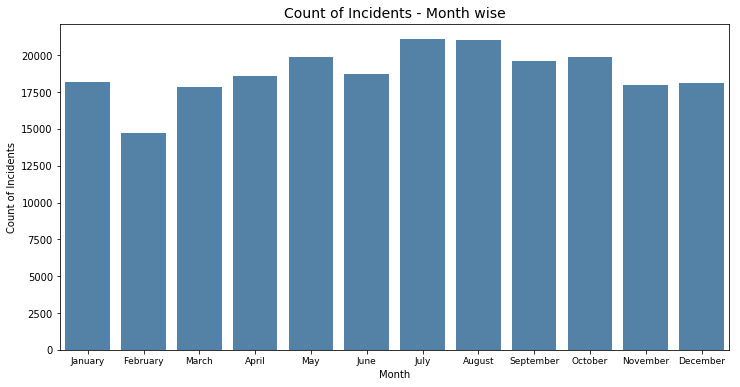

In [34]:
fig,ax = plt.subplots(figsize=(12,6))
#sns.countplot(x="Month",data=df, color = ['blue','aliceblue','skyblue','lightskyblue','dodgerblue', 'skyblue', 'steelblue', 'steelblue', 'dodgerblue','dodgerblue','lightblue','lightblue'])
sns.countplot(x="Month",data=df, color ='steelblue')
ax.set_xticklabels(["January","February","March", "April", "May", "June", "July", "August", 
                    "September","October","November","December"], fontsize=9)
#ax.yaxis.tick_right()
#ax.yaxis.set_label_position('right')
#ax.yaxis.set_major_locator(ticker.LinearLocator(11))

ax.set_title('Count of Incidents - Month wise',loc='center', fontsize=14, fontweight=2, color='Black');
plt.ylabel('Count of Incidents')
plt.savefig('Monthwiseincident.jpeg')

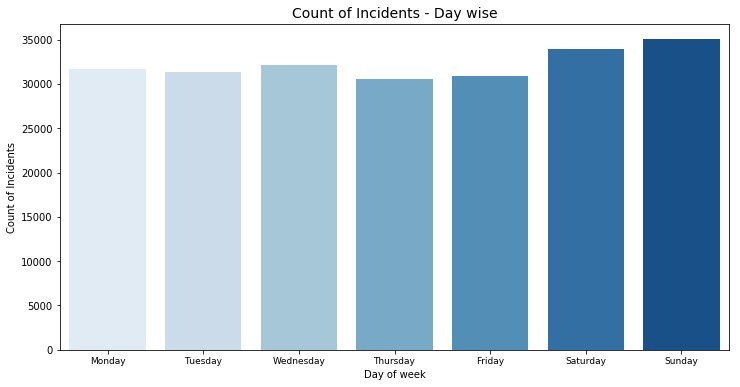

In [13]:
fig,ax = plt.subplots(figsize=(12,6))
#descending_order = df['Day of week'].value_counts().head(12).sort_values(ascending=True).index
sns.countplot(x="Day of week",data=df, palette = 'Blues')
ax.set_xticklabels(["Monday","Tuesday","Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], fontsize=9)
ax.set_title('Count of Incidents - Day wise', loc='center', fontsize=14, fontweight=2, color='Black');
plt.ylabel('Count of Incidents')
plt.savefig('Weekwiseincident.jpeg')

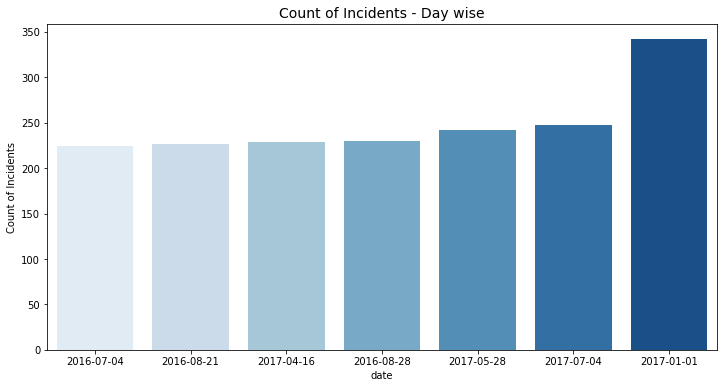

In [14]:
fig,ax = plt.subplots(figsize=(12,6))
descending_order = df['date'].value_counts().head(7).sort_values(ascending=True).index
sns.countplot(x="date",data=df, order = descending_order, palette = 'Blues')
ax.set_title('Count of Incidents - Day wise', loc='center', fontsize=14, fontweight=2, color='Black');
plt.ylabel('Count of Incidents')
plt.savefig('Daywiseincident.jpeg')

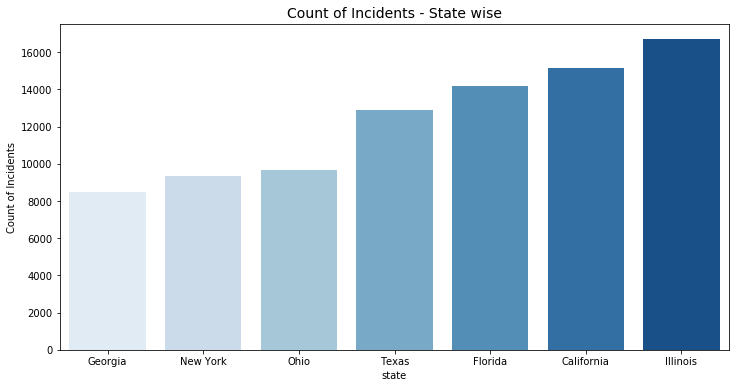

In [15]:
fig,ax = plt.subplots(figsize=(12,6))
descending_order = df['state'].value_counts().head(7).sort_values(ascending=True).index
sns.countplot(x="state",data=df, order = descending_order, palette = 'Blues')

ax.set_title('Count of Incidents - State wise', loc='center', fontsize=14, fontweight=2, color='Black');
plt.ylabel('Count of Incidents')
plt.savefig('Statewiseincident.jpeg')

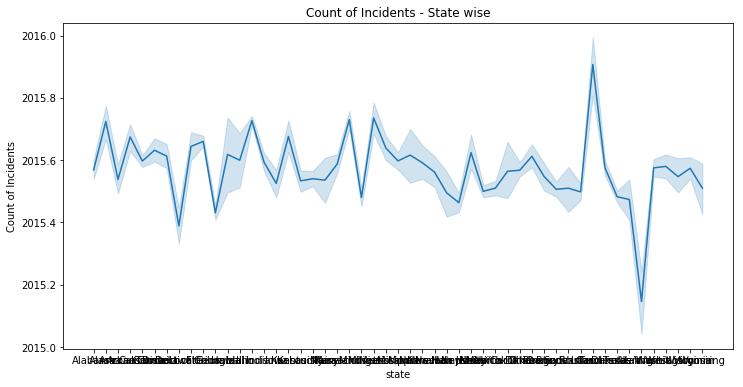

In [16]:
fig,ax = plt.subplots(figsize=(12,6))
#descending_order = df['state'].value_counts().head(10).sort_values(ascending=True).index
sns.lineplot(data=df,x="state",y="Year")
ax.set_title('Count of Incidents - State wise');
plt.ylabel('Count of Incidents')
plt.savefig('Statewiseincident.jpeg')

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in df.drop('Year', axis=1):
    num+=1
plt.plot(df['Year'], df[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)
 
# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("Day Vs Year", loc='center', fontsize=12, fontweight=0, color='Black')
plt.xlabel("Time")
plt.ylabel("Score")


In [ ]:
df.date = pd.to_datetime(df.date)
df.set_index('date', inplace=True)
# Group by day, count incidens, plot graph
incident_df = df.groupby(pd.Grouper(freq='d')).agg({'incident_id':'count'}).rename(columns={'incident_id':'incidents'})
incident_df.plot(figsize=(16,5), title='Daily incidents in the US', color='navy')

#text = 'The data from\n2013 seems\nquestionable'
#plt.annotate(text, (incident_df.index[364], incident_df.incidents[364]), xytext=(-120, 50), textcoords='offset points', arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('Date')
plt.ylabel('Incidents')
plt.show()

In [ ]:
f, axarr = plt.subplots(4, sharex=True, figsize=(14,6))
df.groupby(pd.Grouper(freq='d')).incident_id.count().plot(ax=axarr[0], color='slateblue')
df.groupby(pd.Grouper(freq='w')).incident_id.count().plot(ax=axarr[1], color='midnightblue')
df.groupby(pd.Grouper(freq='m')).incident_id.count().plot(ax=axarr[2], color='b')
df.loc['2014-Jan':'2017-Dec'].groupby(pd.Grouper(freq='y')).incident_id.count().plot(ax=axarr[3])
axarr[0].set_title('Incidents grouped by day')
axarr[1].set_title('Incidents grouped by week')
axarr[2].set_title('Incidents grouped by month')
axarr[3].set_title('Incidents grouped by year')

plt.tight_layout()
plt.show()

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))

descending_order = df['Year'].value_counts().head(10).sort_values(ascending=True).index
sns.countplot(x="Year", order = descending_order, palette = 'Blues')
ax.set_title('Count of Incidents - Year wise');
plt.ylabel('Count of Incidents')
plt.savefig('Yearwiseincident.jpeg')

#ax = plt.gca()
#df.plot(kind='line',x='Count of Incidents',y='num_children',ax=ax)
#df.plot(kind='line',x='Count of Incidents',y='num_pets', color='red', ax=ax)

#plt.show()

In [ ]:
# Libraries
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
 
 
# Calculate the distance between each sample
Z = linkage(df, 'ward')
 
# Make the dendro
dendrogram(Z, labels=df.index, leaf_rotation=0, orientation="left", color_threshold=240, above_threshold_color='grey')
 
# Create a color palette with 3 color for the 3 cyl possibilities
my_palette = plt.cm.get_cmap("Accent", 3)
 
# transforme the 'cyl' column in a categorical variable. It will allow to put one color on each level.
df['Date']=pd.Categorical(df['Date'])
my_color=df['Date'].cat.codes
 
# Apply the right color to each label
ax = plt.gca()
xlbls = ax.get_ymajorticklabels()
num=-1
for lbl in xlbls:
    num+=1
val=my_color[num]
lbl.set_color(my_palette(val))